# Final Project: Credit Card Fraud Detection

## Introduction

In today’s digital economy, credit card transactions are a cornerstone of financial activity but are increasingly vulnerable to fraud, costing billions annually. Traditional fraud detection methods, such as manual reviews and rule-based systems, struggle to keep pace with the complexity and volume of modern fraudulent activities.

This project aims to develop a machine learning-based credit card fraud detection system to identify and prevent fraudulent transactions. By analyzing transaction data, the system will classify legitimate and suspicious activities, focusing on minimizing false positives and false negatives. Various algorithms, including logistic regression, decision trees, and neural networks, will be evaluated to determine the most effective model.

This report outlines the data preparation, model development, and evaluation process, emphasizing the critical role of machine learning in enhancing financial security and reducing fraud risks.

## Steps for Working with Datasets

1. **Data Collection**: Gather relevant data from sources like databases or APIs.
1. **Exploratory Data Analysis (EDA)**: Understand data patterns, distributions, and detect outliers.
1. **Data Cleaning**: Handle missing values, correct errors, and remove duplicates.
1. **Feature Engineering**: Create or transform features to improve model performance.
1. **Data Splitting**: Divide data into training, validation, and testing sets.
1. **Model Training**: Fit the machine learning model using the training data.
1. **Model Evaluation**: Assess performance using metrics like accuracy, precision, and recall.
1. **Model Optimization**: Tune hyperparameters and apply techniques to improve accuracy.
1. **Deployment**: Integrate the model into a real-world application for predictions.
1. **Monitoring**: Continuously track performance and update the model as needed.

In this project, we already have the dataset, so we are going to work with: data cleaning, exploratory data analysis (which includes data visualization), and model evaluation.

## Import the needed libraries

In [ ]:
# These libraries are previously installed in the environment.
# Check the README.md file for more information.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import and organize the dataset

In [18]:
# Create the dataframe from the imported CSV file
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

### Missing values

In [19]:
# Check the missing values
print(df.isna().sum()) 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
# Drop the missing values
df=df.dropna() 

# Check the missing values again
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Duplicates

In [21]:
# Check the duplicates
print(df.duplicated().sum())

1081


In [22]:
# Drop the duplicates
df=df.drop_duplicates()

# Check the duplicates again
print(df.duplicated().sum())

0


## Exploratory Data Analysis (EDA)

**Question 1**: What is the percentage of fraudulent transactions in the dataset?

In [23]:
# Calculate the percentage of fraud cases
fraud_percentage = (df['Class'].sum() / len(df)) * 100

# Print the percentage of fraud cases
print(f"The percentage of fraud cases is {fraud_percentage:.2f}%")

The percentage of fraud cases is 0.17%


**Question 2**: What is the average amount of fraudulent transactions?

In [24]:
# Calculate the average amount of fraud cases
fraud_data = df[df['Class'] == 1]
average_fraud_amount = fraud_data['Amount'].mean()

# Print the average amount of fraud cases
print(f"The average amount of fraud cases is ${average_fraud_amount:.2f}")

The average amount of fraud cases is $123.87


### Data Visualization

**Question 1**: How many fraudulent transactions are there compared to non-fraudulent ones? (Use a bar graph)

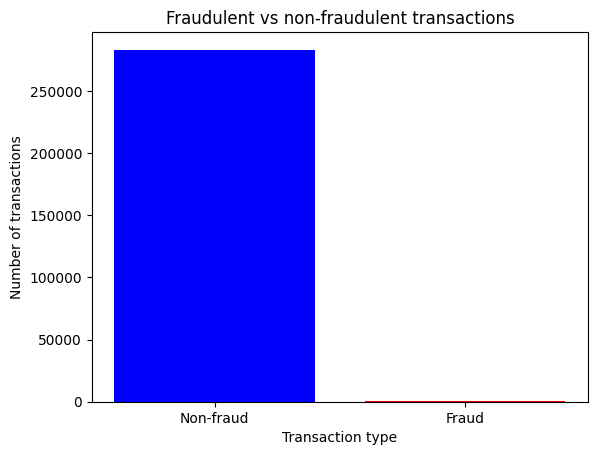

In [34]:
# Calculate the average amount of fraud and non-fraud cases
fraud_counts = df['Class'].value_counts()

# Plot the bar chart
plt.bar(['Non-fraud', 'Fraud'], fraud_counts, color=['blue', 'red'])
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions')
plt.title('Fraudulent vs non-fraudulent transactions')
plt.show()

**Question 2**: What is the distribution of fraudulent transaction amounts? (Use a histogram)

In [ ]:
# Extract the fraud data
fraud_data = df[df['Class'] == 1]

# Plot the histogram
plt.hist(fraud_data['Amount'], bins=50, edgecolor='black')
plt.xlabel('Transaction amount')
plt.ylabel('Number of transactions')
plt.title('Distribution of fraudulent transaction amounts')
plt.show()